# Spotify Songs Genre Segmentation (By Suyash Abhishek Kumar)

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

### Load Data

In [5]:
df = pd.read_csv('./datasets/spotify_songs.csv')

### Select Numerical Features for Clustering

In [7]:
numeric_features = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'track_popularity']]
text_features = df[['track_name', 'track_artist', 'playlist_name', 'playlist_genre', 'playlist_subgenre']]
print("Missing Values:\n\nNumeric\n", numeric_features.isnull().sum(), "\n\nText\n", text_features.isnull().sum())

Missing Values:

Numeric
 danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_popularity    0
dtype: int64 

Text
 track_name           5
track_artist         5
playlist_name        0
playlist_genre       0
playlist_subgenre    0
dtype: int64


### Handle Missing Values

In [16]:
numeric_features = numeric_features.fillna(numeric_features.mean())

### Encode text-based features

In [18]:
label_encoders = {}
for column in text_features.columns:
    le = LabelEncoder()
    text_features[column] = le.fit_transform(text_features[column])
    label_encoders[column] = le

C:\Users\suyas\AppData\Local\Temp\ipykernel_26312\1423087845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_features[column] = le.fit_transform(text_features[column])
C:\Users\suyas\AppData\Local\Temp\ipykernel_26312\1423087845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_features[column] = le.fit_transform(text_features[column])
C:\Users\suyas\AppData\Local\Temp\ipykernel_26312\1423087845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [19]:
features = pd.concat([numeric_features, text_features], axis=1)

### Feature Scaling

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

### PCA for Visualization

In [23]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

### K-means Clustering

In [25]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = clusters

### Visualize PCA components

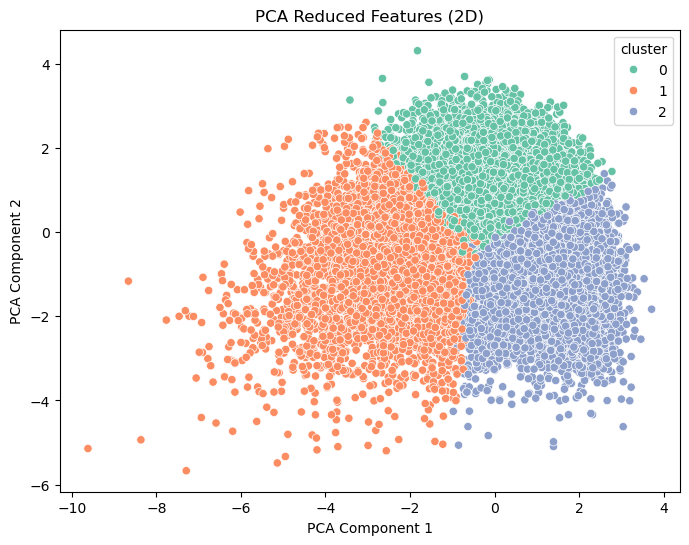

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['cluster'], palette='Set2')
plt.title('PCA Reduced Features (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Visualize clusters for different parameters

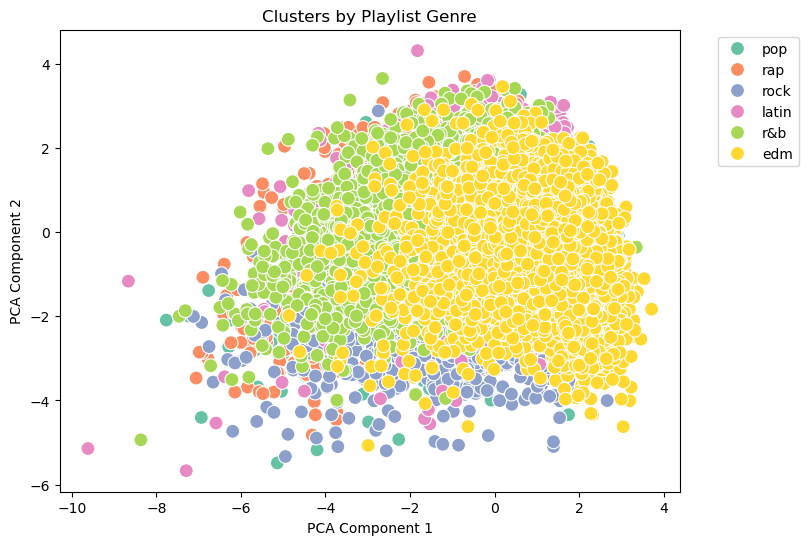

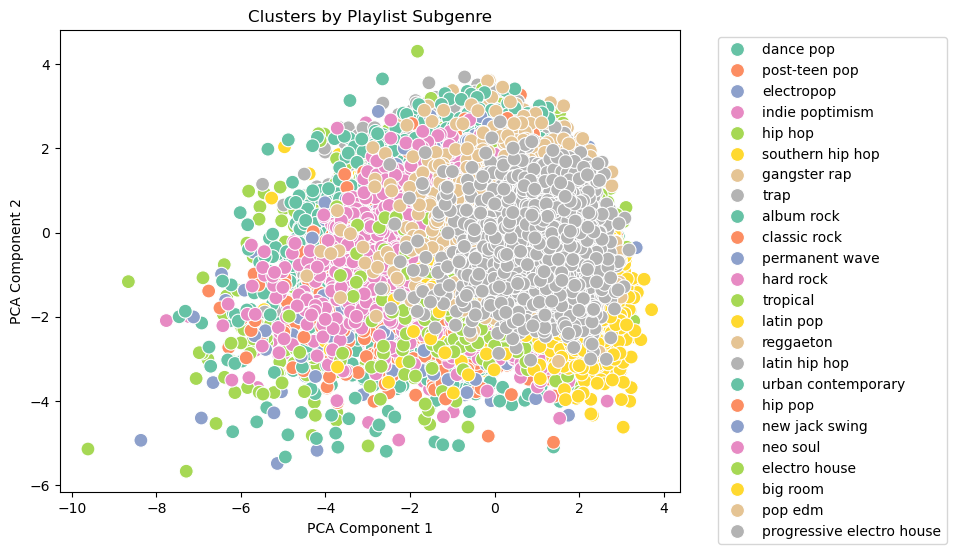

In [29]:
params = ['playlist_genre', 'playlist_subgenre']

for param in params:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df[param], palette='Set2', s=100)
    plt.title(f'Clusters by {param.replace("_", " ").title()}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### Correlation matrix heatmap

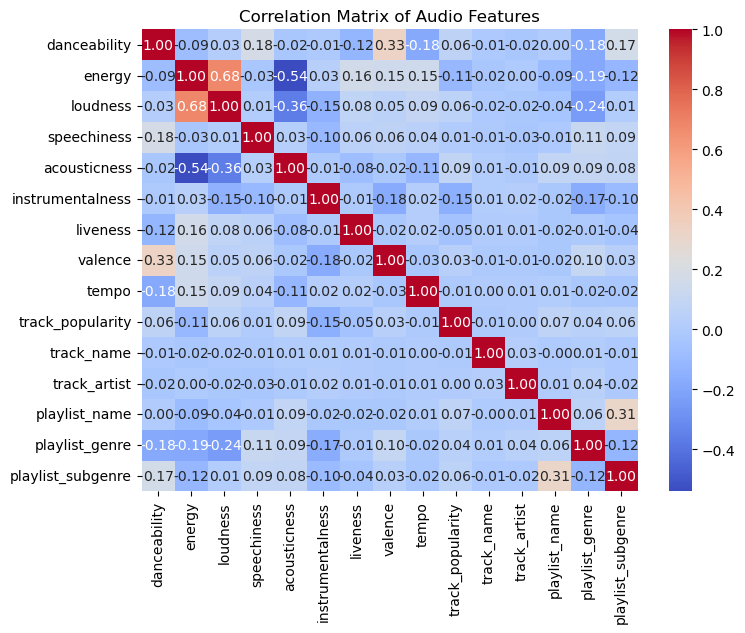

In [31]:
plt.figure(figsize=(8, 6))
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Audio Features')
plt.show()

### Similarity matrix

In [33]:
similarity_matrix = cosine_similarity(df_scaled)

### Print Function

In [35]:
def print_top_songs(df, similarity_matrix, track_name):
    print(f"\nTop Recommendations for '{track_name}':")
    track_idx = df.index[df['track_name'] == track_name].tolist()[0]
    top_scores = list(enumerate(similarity_matrix[track_idx]))
    top_scores = sorted(top_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i in top_scores[1:11] if i[0] != track_idx]
    recommendations = df.iloc[[i[0] for i in top_indices]][['track_name', 'track_artist', 'playlist_name']]
    return recommendations

In [36]:
print_top_songs(df, similarity_matrix, 'Memories - Dillon Francis Remix')


Top Recommendations for 'Memories - Dillon Francis Remix':


,track_name,track_artist,playlist_name
633,No Fear No More,Madeon,Pop / Dance
1286,Payphone,Maroon 5,Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s
3266,Payphone,Maroon 5,Mix ElectroPop//ElectroHouse// DeepHouse 2020
744,Soltera - Remix,Lunay,Todo Éxitos
722,Lola Bunny,Lola Indigo,Todo Éxitos
4072,Let Go,RAC,The Sound of Indie Poptimism
478,Heroine,SUNMI,K-Party Dance Mix
679,I'm Not Alright,Loud Luxury,Pop / Dance
37,Side Effects - Fedde Le Grand Remix,The Chainsmokers,Pop Remix
3305,I Feel So Bad,Kungs,Mix ElectroPop//ElectroHouse// DeepHouse 2020
